<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Download models and install dependencies

In [ ]:
%%shell

git clone https://github.com/kuprel/min-dalle
mkdir -p /content/min-dalle/pretrained/vqgan/
curl https://huggingface.co/dalle-mini/vqgan_imagenet_f16_16384/resolve/main/flax_model.msgpack -L --output /content/min-dalle/pretrained/vqgan/flax_model.msgpack
pip install torch flax==0.4.2 wandb
wandb login --anonymously
wandb artifact get --root=/content/min-dalle/pretrained/dalle_bart_mini dalle-mini/dalle-mini/mini-1:v0
wandb artifact get --root=/content/min-dalle/pretrained/dalle_bart_mega dalle-mini/dalle-mini/mega-1-fp16:v14


### Load Model
Check "reusable" if you are using a high RAM runtime. This allows the model to be reused for multiple text prompts.

In [6]:
import os
os.chdir('/content/min-dalle')
from min_dalle.min_dalle_torch import MinDalleTorch
from min_dalle.min_dalle_flax import MinDalleFlax

mega = True #@param {type:"boolean"}
torch = True #@param {type:"boolean"}
reusable = False #@param {type:"boolean"}
model_class = MinDalleTorch if torch else MinDalleFlax
model = model_class(mega, not expendable)


reading files from pretrained/dalle_bart_mega
initializing MinDalleTorch
initializing DalleBartEncoderTorch
initializing DalleBartDecoderTorch
initializing VQGanDetokenizer


### Generate an Image

tokenizing text
['Ġa']
['Ġcomfy']
['Ġchair']
['Ġthat']
['Ġlooks']
['Ġlike']
['Ġan']
['Ġavocado']
text tokens [0, 58, 29872, 2408, 766, 4126, 1572, 101, 16632, 2]
encoding text tokens
sampling image tokens
detokenizing image


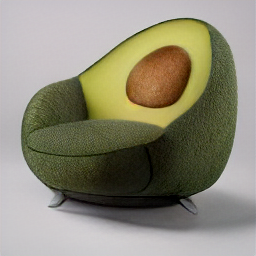

CPU times: user 16.3 s, sys: 39.3 ms, total: 16.3 s
Wall time: 16.2 s


In [7]:
%%time

text = "a comfy chair that looks like an avocado" #@param {type:"string"}
seed = 10 #@param {type:"integer"}

image = model.generate_image(text, seed)
display(image)